## 2.1.1 유튜브 랭킹 데이터 수집하기

In [2]:
# 라이브러리 추가하기
from selenium import webdriver 
from bs4 import BeautifulSoup 
import time
import pandas as pd

In [3]:
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

In [4]:
# webdriver로 크롬 브라우저 실행하기
## browser = webdriver.Chrome('C:/Myexam/chromedriver/chromedriver.exe')

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
driver.get(url)

In [5]:
# 페이지 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# BeautifulSoup으로 tr 태그 추출하기
channel_list = soup.select('tr') 
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a>

In [7]:
# tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [8]:
# 채널태그출력및태그구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/U3VrCkKjzTpQ3VYv4SCPjNfDHeJV-swGNnhLYhr0nV4lZz_GVUNzK4EB-HFRfKv9S5VNh14uAg=s88-c-k-c0x00ffffff-no-rj" height="88" src="https://yt3.ggpht.com/U3VrCkKjzTpQ3VYv4SCPjNfDHeJV-swGNnhLYhr0nV4lZz_GVUNzK4EB-HFRfKv9S5VNh14uAg=s88-c-k-c0x00ffffff-no-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
				

In [9]:
#  카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [10]:
#  채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [11]:
#  구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

9570만
378억7825만
603개


In [12]:
# 반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr.aos-init')

# 페이지가 파싱 된 후, 조금 시간이 지나면 변경 기록을 표시하는 <ins>태그가 추가되면서 길이가 101이 되면서 반복문 마지막에 index out of range 에러가 발생
# class명 등으로 따로 골라내기 or channel_list[:100] 을 이용해서 1위부터 100위까지만 가져오기
print(len(channel_list))

for channel in channel_list:
#for channel in channel_list[:100]:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)

100
BLACKPINK [음악/댄스/가수] 9570만 378억7825만 603개
김프로KIMPRO [BJ/인물/연예인] 8180만 511억7731만 2,934개
BANGTANTV [음악/댄스/가수] 7970만 241억6170만 2,690개
HYBE LABELS [음악/댄스/가수] 7640만 377억8802만 2,283개
Mark Rober [미분류] 6320만 97억9001만 192개
Taylor Swift [미분류] 6060만 380억4087만 285개
DaFuq!?Boom! [미분류] 4500만 183억0177만 306개
SMTOWN [음악/댄스/가수] 3290만 308억7811만 4,492개
JYP Entertainment [음악/댄스/가수] 3020만 240억2304만 2,313개
Alan Becker [해외] 2980만 78억4196만 221개
Netflix [미분류] 2970만 92억1104만 7,791개
승비니 Seungbini [BJ/인물/연예인] 2670만 205억6834만 572개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2630만 84억1903만 8,187개
1theK (원더케이) [음악/댄스/가수] 2490만 260억4765만 20,944개
GH'S [미분류] 2370만 185억1139만 904개
Mnet K-POP [음악/댄스/가수] 2160만 174억3346만 40,582개
CRAZY GREAPA [미분류] 2150만 174억9373만 1,312개
KBS WORLD TV [TV/방송] 2000만 170억1649만 75,526개
officialpsy [음악/댄스/가수] 1930만 118억9765만 132개
Stray Kids [음악/댄스/가수] 1910만 67억8569만 1,434개
Jane ASMR 제인 [음식/요리/레시피] 1820만 78억8734만 2,441개
TWICE [음악/댄스/가수] 1790만 70억90

In [13]:
# 페이지별 URL 만들기
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [14]:
# 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
# 페이지별 URL로 크롤링하는 방식
results = []
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    driver.get(url)
    time.sleep(2)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)
driver.quit()

In [15]:
# 데이터 칼럼명을 설정하고 엑셀 파일로 저장하기
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']

In [16]:
# 엑셀에서 허용하지 않는 특수문자를 가지고 있어 에러 발생
# 해당 특수문자를 replace로 삭제
df["title"] = df["title"].str.replace("","")

In [17]:
df.to_excel('youtube_rank.xlsx', index = False)

In [18]:
# 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
# 버튼 클릭으로 다음페이지 넘어가는 방식

results2 = []
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
driver.get(url)
time.sleep(2)

for i in range(20):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')

    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results2.append(data)
    
    # 다음 페이지 버튼 클릭
    pg_current = driver.find_element(By.CSS_SELECTOR,'.pg_current').text
    nxt_btn = driver.find_elements(By.CSS_SELECTOR,'.pg_page')
    for btn in nxt_btn:
        # 현재 페이지가 10의 배수(10,20,30..)일 경우에는 다음 페이지 버튼을 클릭해야함
        if btn.text.isdigit() and int(btn.text) % 10 == 0:
            nxt_page_btn = driver.find_element(By.CSS_SELECTOR,'.pg_next')
            nxt_page_btn.click()
            time.sleep(1)
            break
        # 그 외에는 (현재 페이지 + 1) 버튼을 클릭
        elif btn.text.isdigit():
            if int(pg_current) +1 == int(btn.text):
                btn.click()
                time.sleep(1)
                # 광고 제거 : 10의 배수 페이지에도 넣어야하나 광고가 최초 1번밖에 안뜨는거 같아서 아직 고려중
                try:
                    iframe = driver.find_element(By.CSS_SELECTOR, '#aswift_3')
                    driver.switch_to.frame(iframe)
                    iframe1 = driver.find_element(By.CSS_SELECTOR, '#ad_iframe')
                    driver.switch_to.frame(iframe1)
                    
                    ad = driver.find_element(By.CSS_SELECTOR,'.close-button')
                    ad.click()
                    driver.switch_to.default_content()
                    
                    time.sleep(1)
                    break
                except:
                    break
driver.quit()

In [19]:
df2 = pd.DataFrame(results2)
df2.columns = ['title', 'category', 'subscriber', 'view', 'video']

In [20]:
# 엑셀에서 허용하지 않는 특수문자를 가지고 있어 에러 발생
# 해당 특수문자를 replace로 삭제
df2["title"] = df2["title"].str.replace("","")

In [21]:
df2.to_excel('youtube_rank2.xlsx', index = False)

## 2.1.2 유튜브 랭킹 데이터 시각화하기

In [23]:
# 라이브러리 추가하기
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [25]:
# 엑셀 파일 불러오기
df = pd.read_excel('youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],9570만,378억7825만,603개
1,김프로KIMPRO,[BJ/인물/연예인],8180만,511억7731만,"2,934개"
2,BANGTANTV,[음악/댄스/가수],7970만,241억6170만,"2,690개"
3,HYBE LABELS,[음악/댄스/가수],7640만,377억8802만,"2,283개"
4,Mark Rober,[미분류],6320만,97억9001만,192개


In [26]:
# 데이터 살펴보기
df.tail()

,title,category,subscriber,view,video
995,BANDAI NAMCO Europe,[미분류],92만,4억5507만,"4,428개"
996,도영도영이,[패션/미용],92만,9698만,278개
997,Big Funny,[키즈/어린이],92만,3만,43개
998,Healing Meditation,[음악/댄스/가수],92만,1억3446만,561개
999,재훍 영상툰,[미분류],92만,5억2645만,344개


In [27]:
# 데이터 살펴보기
df['subscriber'][0:10]

0    9570만
1    8180만
2    7970만
3    7640만
4    6320만
5    6060만
6    4500만
7    3290만
8    3020만
9    2980만
Name: subscriber, dtype: object

In [28]:
# 데이터 살펴보기
df['subscriber'].str.replace('만', '0000')[0:10]

0    95700000
1    81800000
2    79700000
3    76400000
4    63200000
5    60600000
6    45000000
7    32900000
8    30200000
9    29800000
Name: subscriber, dtype: object

In [29]:
# replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],9570만,378억7825만,603개,95700000
1,김프로KIMPRO,[BJ/인물/연예인],8180만,511억7731만,"2,934개",81800000
2,BANGTANTV,[음악/댄스/가수],7970만,241억6170만,"2,690개",79700000
3,HYBE LABELS,[음악/댄스/가수],7640만,377억8802만,"2,283개",76400000
4,Mark Rober,[미분류],6320만,97억9001만,192개,63200000


In [30]:
# 데이터 상세 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [31]:
# Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [32]:
# 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],231840000,57
[IT/기술/컴퓨터],11040000,6
[TV/방송],285200000,108
[게임],76010000,45
[교육/강의],30970000,18


In [33]:
# 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],231840000,57
[IT/기술/컴퓨터],11040000,6
[TV/방송],285200000,108
[게임],76010000,45
[교육/강의],30970000,18


In [34]:
# 데이터프레임의인덱스초기화하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],231840000,57
1,[IT/기술/컴퓨터],11040000,6
2,[TV/방송],285200000,108
3,[게임],76010000,45
4,[교육/강의],30970000,18


In [35]:
# 데이터프레임을내림차순정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],886530000,140
7,[미분류],773210000,238
16,[키즈/어린이],461390000,131
2,[TV/방송],285200000,108
0,[BJ/인물/연예인],231840000,57


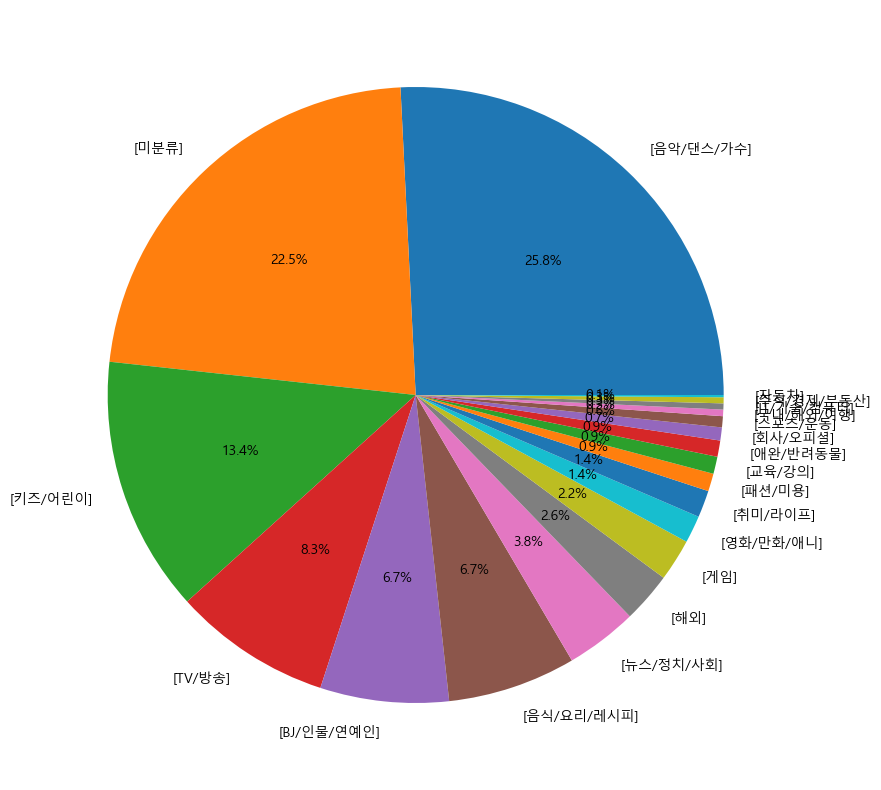

In [36]:
# 카테고리별구독자수시각화하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

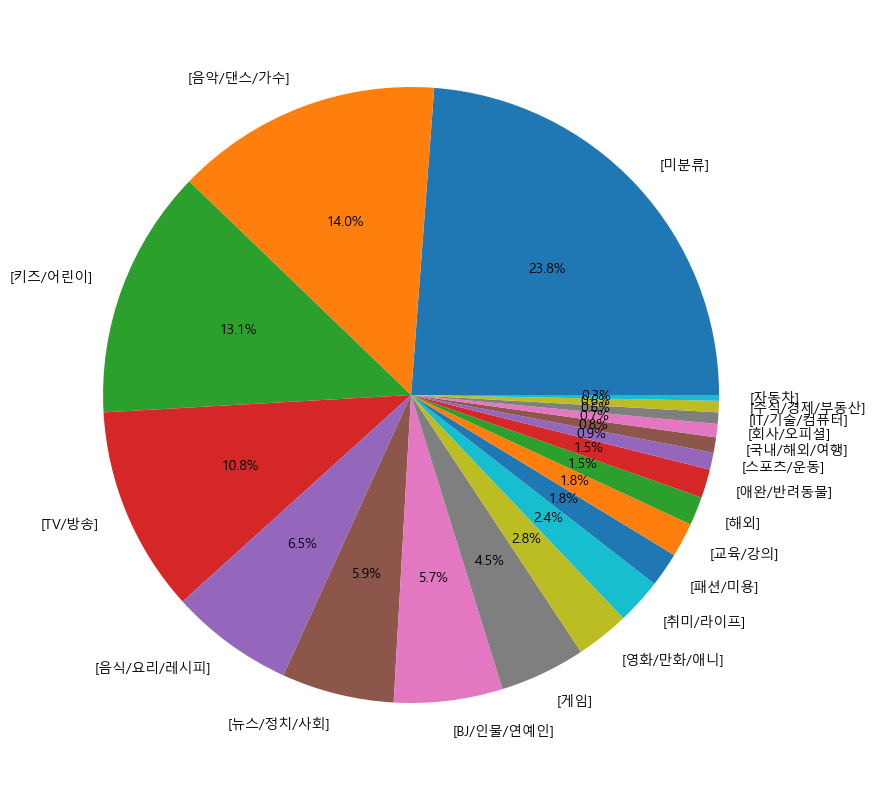

In [37]:
# 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()